# SHREYA MITTAL

# OBJECT DETECTION USING  OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

# Using COCO Dataset

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000235F436BB30>

# read an image

In [8]:
 img=cv2.imread('pic.jpg')

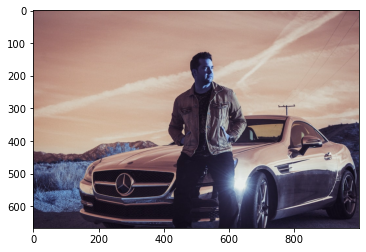

In [9]:
plt.imshow(img)

# converting from bgr to rgb

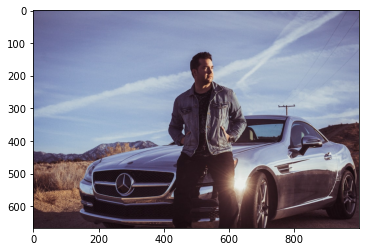

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [12]:
print(ClassIndex)

[1 3]


In [13]:
font_scale=3
font= cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex, confidece, bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)

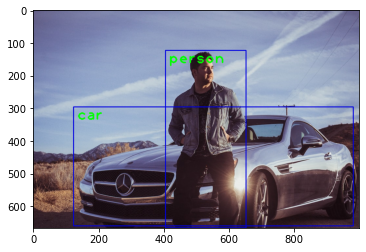

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# video demo

In [21]:
cap=cv2.VideoCapture('video.webm')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open video")
        
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex, confidece, bbox):
            
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[3 1 3 1]
[3 1 1]
[3 1]
[3 1 1]
[3 1 1]
[3 1 1 3]
[ 3 10  3  1  1]
[3 1 1 3]
[3 1 1 6 1]
[3 6 1]
[1 3]
[1 3]
[1]
()
()
[1]
[3]
[3 3 1]
[3 3]
[3 3]
[3]
[3]
[3 3]
[3]
[3]
[3 6]
[3 6]
[6 3]
[3 6 3]
[6]
[6 3]
[6 1 3 1]
[1 6 3 1]
[6 1 1]
[6 3 1]
[6 3 3]
[3 6]
[6 3 3]
[3 6 1 1]
[3 6 1]
[1 6 1]
[6 1 1 1 3 3]
[6 1 3]
[6 3 3 1]
[3 1 1 1 6 3]
[3 3]
[3 1 3 3]
[3 3 3 3 1]
[3 3 1 3 1 1]
[3 3 3]
[3 6 3]
[3 1 1 3 1 1]
[3 3 1 1 1 1]
[3 1 1 3 1]
[3 1 1 3 1 1]
[3 1 3 1]
[1 3 1 1 1 3]
[1 1 3 1 3 1]
[3 1 1 1]
[3 1]
[3 1 1 1 3]
[3 1 1 3]
[3 1]
[3]
[3 3]
[3 1 1 1 1]
[1 3 1 1 3 3]
[3 1 3 3]
[3]
[3 3 1]
[3 1 1 1 1]
[3 1 1]
[3 3 1 1 3]
[3 3 3 8 1 1 3]
[3]
[3 3 1]
[3 1]
[3 3]
[3 3 3]
[3 3 3 1]
[3 3 3]
[3 1 1]
[1 3 1 1]
[1 1 1]
()
[1 3]
[3 6]
()
[3 1 3]
[3 3]
[ 3  3 10]
[3 3 3]
[3 3 3]
[3 3]
[3]
[3 3]
[3 6 3 3]
[3 6]
[3 3 3]
[3 3]
[3]
[3 6]
[3 6]
[3 6]
[3]
[3 6]
[3 6]
[3 6 6]
[3 6 6]
[3 3]
[3 7 6 3]
[ 3  7  6 10]
[3 7]
[3 7]
[3 6 7 6]
[3 6]
[3]
[3 3]
[3]
[3]
[3 3]
[3 3]
[3 3]
[3 3]
[ 3  3 10]
[3 3 1 1]
[3 3]
[3 

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
